In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def useful_code():

  #Multiply two matrices together:
  A = np.array([[1,2],[3,4]])
  B = np.array([[5,6],[7,8]])
  C = np.matmul(A, B)
  print("Multiplication of \n", A, "\nand\n", B, "\ngives:\n", C)

  d = np.array([[3], [-2],])

  #matrix solving for Ax = d:
  x = np.linalg.solve(A, d)

  d_check = np.matmul(A, x)
  print(d_check, "should match", d)

  #logarithms:
  b = 0.145
  a = np.log(b)
  print("log of "+str(b)+" is "+str(a)+". exp of "+str(a)+" is "+str(np.exp(a))+".")

  x_low = 0
  x_high = 2*np.pi
  n_x_values = 20
  #define a set of n_x_values points between x_low and x_high (0 to
  #2 pi in this case):
  x = np.linspace(x_low,x_high,n_x_values)
  y = np.cos(x)

  #summing and squaring:
  print("Sum of y squared: ", np.sum(y**2))

  #demonstrate a for loop
  y2_total = 0
  for cnt in range(n_x_values):
    y2_total = y2_total + y[cnt]*y[cnt]
  print(y2_total)


  #Plotting functions/points:
  fig, ax = plt.subplots()  #define a figure
  #plot the points given by vectors x and y with a red
  #solid line ('r-'), and blue dots 'b.'. k is black, r red and g green.
  plt.plot(x, y, 'b.')
  plt.plot(x, y, 'r-')

  #count how many values of y are less than zero:
  num_y_less_than_zero = np.count_nonzero(y < 0)

  #find the 4 smallest values of y
  n_smallest = 4
  indices_of_smallest = np.argpartition(y, n_smallest)[:n_smallest]
  print("Smallest values of y:", y[indices_of_smallest])

  #get the absolute of y
  y_abs = np.abs(y)

  #generate two random sets of values x1 and x2
  n_points = 20
  x1 = np.random.normal(loc=0,scale=1,size=n_points)
  x2 = np.random.normal(loc=0,scale=1,size=n_points)
  #Combine two vectors x1 and x2, of length n_points, into
  # a matrix of size n_points x 2
  X = np.column_stack([x1, x2])

  print(X.shape)
  #add an extra empty dimension to X
  X = X.reshape([n_points,2,1])
  print(X.shape)
  #now remove the redundant dimension:
  X = X.squeeze()
  print(X.shape)

  y = np.zeros([n_points,1]) #define y and set all values to zero
  #now put all the class values to 1 where the x1 value is
  # greater than 0.2
  y[x1 > 0.2] = 1

#useful_code()


In [ ]:
# --- ANSWER FOR Q1 HERE: ---

They mustn't have a 1 in the 3rd point since they must be all be orthogonal to one another.
Dot product must equal 0
(a,b,c,d) . (0, 0, 1, 0) = c so c in any other PC cannot be 1 for it to dot to 0 with the given vector

In [ ]:
# --- END ANSWER FOR Q1 ---

In [ ]:
# --- ANSWER FOR Q2(a) HERE: ---

# m Sx1 Sx2
# Sxi Sx1x1 Sx1x2
# Sx2 Sx1x2 Sx2x2

# B0
# B1
# B2

# =

# Sy
# Sx1y
# Sx2y


In [ ]:
# --- END ANSWER FOR Q2(a) ---

[1.4671747] [0.64310725]


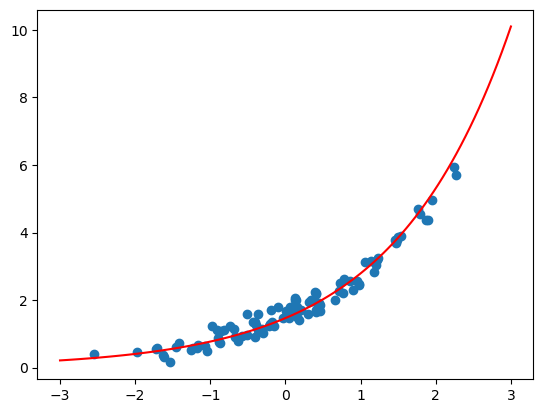

In [ ]:
# --- ANSWER FOR Q2(b) HERE: ---
#load the data
df = pd.read_csv("d2b.csv")
x = np.array(df['x'])
y = np.array(df['y'])
plt.scatter(x, y)
y = np.log(y)
m = x.size



sx = np.sum(x)
sx2 = np.sum(x**2)
sy = np.sum(y)
sxy = np.sum(x*y)

A = np.array([[m, sx], [sx, sx2]])
C = np.array([[sy], [sxy]])

B = np.linalg.solve(A, C)
c1 = np.exp(B[0])
c2 = B[1]
print(c1, c2)
def y_pred(x):
  return c1*np.exp(c2*x)

xrange = np.linspace(-3, 3, 100)

plt.plot(xrange, y_pred(xrange), 'r-')



In [ ]:
# --- END ANSWER FOR Q2(b) ---

[-4.94594332] [-1.01340891] [1.68879066]


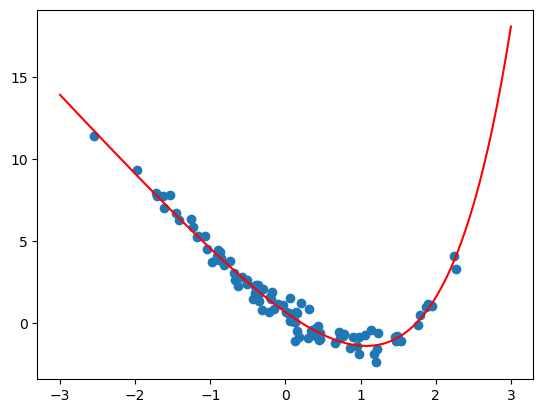

In [19]:
# --- ANSWER FOR Q2(c) HERE: ---
#load the data
df = pd.read_csv("d2c.csv")
x = np.array(df['x'])
y = np.array(df['y'])

plt.scatter(x, y) # Scatter plot of the data

m = x.size
xrange = np.linspace(-3, 3, m) # Range of x values

def f(x, C, D, E): # Function to fit with unknown parameters
    return C * x + D + E * np.exp(x)

sx = np.sum(x) # See working for the following calculations
sx2 = np.sum(x**2)
sex = np.sum(np.exp(x))
sxex = np.sum(np.exp(x) * x)
se2x = np.sum(np.exp(2 * x))
sxy = np.sum(x * y)
syex = np.sum(y * np.exp(x))
sy = np.sum(y)

A_mat = np.array([[sx2, sx, sxex], [sx, m, sex], [sxex, sex, se2x]]) # 3x3 matrix 
B_mat = np.array([[sxy, sy, syex]]).T # 3x1 matrix

C, D, E = np.linalg.solve(A_mat, B_mat) # Solve for constants and unpack
print(C, D, E)

plt.plot(xrange, f(xrange, C, D, E), color="red") # Plot the fitted function in red




In [ ]:
# --- END ANSWER FOR Q2(c) ---

In [ ]:
# --- ANSWER FOR Q2(d) HERE: ---

High lambda means underfitting - high bias and low variance

In [ ]:
# --- END ANSWER FOR Q2(d) ---

In [ ]:
# --- ANSWER FOR Q3(a) HERE: ---

20 trainable weights - 12 between the 1st and 2nd layers, and 8 between  the 2nd and 3rd (don't forget about the bias weight)


In [ ]:
# --- END ANSWER FOR Q3(a) ---

In [21]:
# --- ANSWER FOR Q3(b) HERE: ---
#load the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d3.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
t = np.array(df['y'])
n_points = x.size

def sigmoid(x):
  return 1/(1+np.exp(-x))

def J(tm, zm):
  return np.sum(0.5 * (tm - zm) ** 2)

y1 = -2 * x1 + 3 * x2 + 3
y1 = sigmoid(y1)
y2 = -0.3 * x1 - 1 * x2 + 0.3
y2 = sigmoid(y2)

z1 = 1.5 * y1 + 1 * y2 - 1.8
z1 = sigmoid(z1)

cost = J(t, z1)
print(cost)




3.2057852243701115


In [ ]:
# --- END ANSWER FOR Q3(b) ---

In [ ]:
# --- ANSWER FOR Q3(c) HERE: ---

3(c)

1.0700074241628024 3.2057852243701115
1.1349946870166023 2.7331710859714935
1.1952012822243578 2.3263113580376578
1.2508863162847639 1.9773973486328138
1.3023193403158952 1.679124564599305
1.3497729325603212 1.4248028196929003
1.393516922195757 1.208406923134909
1.4338140707726867 1.024583556481437
1.4709169942692635 0.868627991924827
1.5050661043162938 0.7364417481081803
1.5364883609757836 0.6244796742591718
1.565396653213816 0.5296926131313736
1.591989650942316 0.44946985518400606
1.616452000348976 0.3815840856153689
1.6389547599436864 0.3241404054091014
1.659655997226522 0.27553021353670354
1.6787014847822814 0.23439020019855256
1.6962254500351457 0.19956635633255126
1.7123513451970722 0.17008269877610888
1.7271926135569557 0.14511430100040387
1.7408534356413843 0.12396417425983695
1.7534294443582816 0.10604354006797514
1.7650084023858295 0.0908550557619301
1.7756708381058766 0.07797858938119775
1.7854906385614588 0.06705918078395554
1.7945355994486047 0.057796868159195505
1.8028679

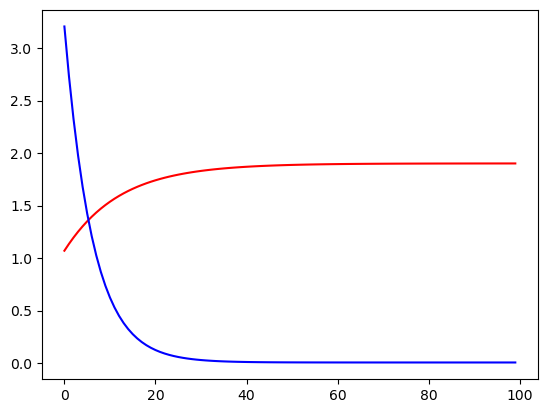

In [43]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_prime(x):
  return sigmoid(x) * (1 - sigmoid(x))

def backprop(step, w212):
    net21 = 1.5 * y1 + w212 * y2 - 1.8
    z1 = sigmoid(net21)
    cost = np.sum(0.5 * (t - z1) ** 2)
    delta = np.sum((t - z1) * sigmoid_prime(net21) * y2) * step
    w212 += delta
    return w212, cost

w212 = 1
steps = 100
weight_list = []
cost_list = []
for _ in range(steps):
   w212, cost = backprop(0.01, w212)
   print(w212, cost)
   weight_list.append(w212)
   cost_list.append(cost)

plt.plot(range(steps), weight_list, c="red")
plt.plot(range(steps), cost_list, c="blue")

  
  

In [ ]:
# --- END ANSWER FOR Q3(c) ---

In [ ]:
# --- ANSWER FOR Q4 HERE: ---

g(x) = (1, x, x^2, cos(x)).T . (A, B, C, D).T

g(x) = y . a

Project into a higher dimension to have A represent a weight for the new feature in this dimension, leaving the bias to be 0

In [ ]:
# --- END ANSWER FOR Q4 ---

5.

2.4975420365465295


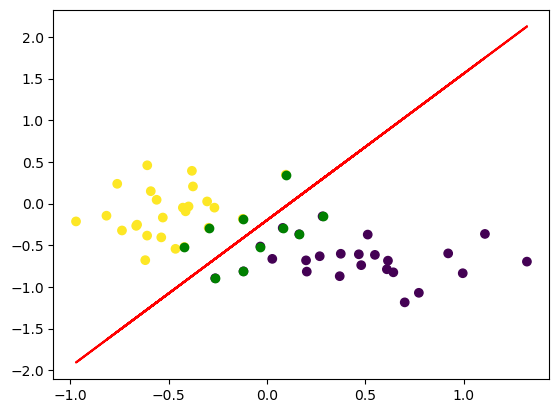

In [16]:
# --- ANSWER FOR Q5 HERE: ---

#load the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d5.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])
n_points = x1.size

w = np.array([-0.869, 0.494])
w0 = 0.0982
g = w[0] * x1 + w[1] * x2 + w0
svm = y * g
x2_func = -w0/w[1] - (w[0] * x1)/w[1]

xrange = np.linspace(-1, 1.5, n_points)
plt.scatter(x1, x2, c=y)
plt.plot(x1, x2_func, c='red')

margin = 0.23

epsilon = 1 - (svm / margin)
C = np.sum(epsilon[epsilon > 0])
print(C)






In [ ]:
# --- END ANSWER FOR Q5 ---

6.


In [18]:
# --- ANSWER FOR Q6 HERE: ---

voters = 100
# w1 = no lie,, w2 = lie
# A = ignore, B = expel, C = investigate

LA_w1 = 0
LA_w2 = -30

LB_w1 = -15
LB_w2 = -18

LC_w1 = -12
LC_w2 = -12

Pw1_x = 0.2
Pw2_x = 0.8

RA = (LA_w1 * Pw1_x) + (LA_w2 * Pw2_x)
RB = (LB_w1 * Pw1_x) + (LB_w2 * Pw2_x)
RC = (LC_w1 * Pw1_x) + (LC_w2 * Pw2_x)

print(RA, RB, RC)


-24.0 -17.4 -12.000000000000002


In [ ]:
# --- END ANSWER FOR Q6 ---

7.

0.45


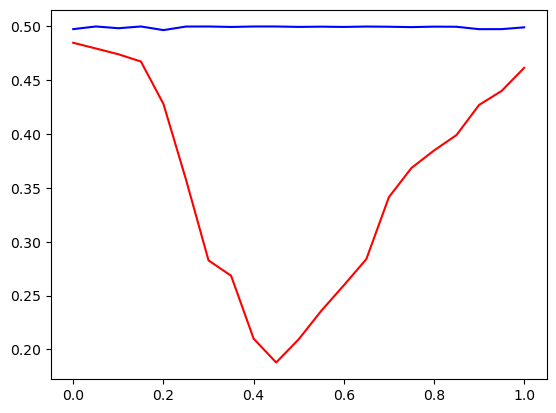

In [30]:
# --- ANSWER FOR Q7 HERE: ---

#load the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d7.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
y = np.array(df['y'])
n_points = x1.size


n_vals = 21
D_vals = np.linspace(0, 1, n_vals)

#x1 search
x1_gini = []
x2_gini = []
for D in D_vals:
    under_y0 = len(x1[(x1 < D) & (y == 0)])
    under_y1 = len(x1[(x1 < D) & (y == 1)])
    over_y0 = len(x1[(x1 >= D) & (y == 0)])
    over_y1 = len(x1[(x1 >= D) & (y == 1)])

    under_tot = under_y0 + under_y1
    over_tot = over_y0 + over_y1

    gini_under = 1 - (under_y0/under_tot)**2 - (under_y1/under_tot)**2
    gini_over = 1 - (over_y0/over_tot)**2 - (over_y1/over_tot)**2

    p_under = under_tot / n_points
    p_over = over_tot / n_points

    weighted_gini = p_under * gini_under + p_over * gini_over
    x1_gini.append(weighted_gini)

    under_y0 = len(x2[(x2 < D) & (y == 0)])
    under_y1 = len(x2[(x2 < D) & (y == 1)])
    over_y0 = len(x2[(x2 >= D) & (y == 0)])
    over_y1 = len(x2[(x2 >= D) & (y == 1)])

    under_tot = under_y0 + under_y1
    over_tot = over_y0 + over_y1

    gini_under = 1 - (under_y0/under_tot)**2 - (under_y1/under_tot)**2
    gini_over = 1 - (over_y0/over_tot)**2 - (over_y1/over_tot)**2

    p_under = under_tot / n_points
    p_over = over_tot / n_points

    weighted_gini = p_under * gini_under + p_over * gini_over
    x2_gini.append(weighted_gini)

plt.plot(D_vals, x1_gini, c='red')
plt.plot(D_vals, x2_gini, c='blue')
print(D_vals[np.argmin(x1_gini)])

In [ ]:
# --- END ANSWER FOR Q7 ---

In [ ]:
# --- ANSWER FOR Q8(a) HERE: ---

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/quehi/d8.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
x3 = np.array(df['x3'])
x4 = np.array(df['x4'])
X = np.column_stack((x1, x2, x3, x4))
y = np.array(df['y'])

n_points = x1.size

def manhattan(x, y):
    return np.sum(np.abs(x - y), axis=1)

p = np.array([[0, -1, 2, 1]])
dist = manhattan(X, p)
print(dist)
print(n_points, len(dist))

sorted_index = np.argsort(dist)[:3]
classes = y[sorted_index]
decision = np.where(np.mean(classes) > 0.5, 1, 0)
print(decision)





264.0572096023428


TypeError: object of type 'numpy.float64' has no len()

In [ ]:
# --- END ANSWER FOR Q8(a) ---

In [73]:
# --- ANSWER FOR Q8(b) HERE: ---
df = pd.read_csv("http://pogo.software/me4ml/quehi/d8.csv")
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
x3 = np.array(df['x3'])
x4 = np.array(df['x4'])
X = np.column_stack((x1, x2, x3, x4))
y = np.array(df['y'])

n_points = x1.size

def l2(x, y):
    return np.sqrt(np.sum((x - y) ** 2, axis=1))

def parzen(x, y, n):
    dist = l2(x, y)
    return np.sum((1 / (2 * np.pi)) * np.exp(-0.5 * dist ** 2))/ n


p = np.array([[0, -1, 2, 1]])

# find p(class|observation) = p(w|x) = p(x|w)p(w) / p(x)
X0 = X[y == 0]
X1 = X[y == 1]

pw0 = len(X0) / n_points
pw1 = len(X1) / n_points
print(pw0, pw1)

px_w0 = parzen(X0, p, len(X0))
px_w1 = parzen(X1, p, len(X1))
print(px_w0, px_w1)

px = px_w0 * pw0 + px_w1 * pw1
print(px)

pw0_x = (px_w0 * pw0) / px
pw1_x = (px_w1 * pw1) / px

print(pw0_x, pw1_x)



0.52 0.48
0.0117835238475955 0.006577149328836313
0.009284464078591091
0.6599661917890142 0.34003380821098583


In [70]:
abs_dist = np.abs(X - p)
L2dist = np.sqrt(np.sum(abs_dist**2, axis=1))
n_0 = np.count_nonzero(y==0)
n_1 = np.count_nonzero(y==1)
p_x_0 = np.sum(1/2/np.pi*np.exp(-1/2*L2dist[y==0]**2))/n_0
p_x_1 = np.sum(1/2/np.pi*np.exp(-1/2*L2dist[y==1]**2))/n_1

p_0 = n_0/(n_0+n_1)
p_1 = n_1/(n_0+n_1)

p_x = p_x_0 * p_0 + p_x_1 * p_1
p_0_x = p_x_0 * p_0 / p_x
p_1_x = p_x_1 * p_1 / p_x
print(p_0, p_1)
print(p_x_0, p_x_1)
print(p_x)
print(p_0_x, p_1_x)

0.52 0.48
0.0117835238475955 0.006577149328836313
0.009284464078591091
0.6599661917890142 0.34003380821098583


In [ ]:
# --- END ANSWER FOR Q8(b) ---

In [ ]:
# --- ANSWER FOR Q8(c) HERE: ---

By classifying on the nearest neighbour (or neighbours), rather than defining a specific distance
(which is the approach with a Parzen window), the routine automatically selects a suitable distance,
simplifying model tuning. It also automatically accounts for localised differences in density in the
training points through the dataset.

In [ ]:
# --- END ANSWER FOR Q8(c) ---